# Algorithm Analysis and Big-O 

An algorithm is a set of steps (instructions) for solving a problem.
<div class="alert alert-info">
PROGRAM = DATA STRUCTURE + ALGORITHM
</div>

> Study the efficiency of algorithms:
    - time complexity
    - space complexity
    
> To estimate the requiered time:
    - Empirical Analysis of Algorithms
    - Theoretical Analysis of Algorithms
        - Running Time Function
        - Big-O notation

### Example Empirical Analysis of Algorithms
Given a number *n*, develop a method to sum from 1 to n. 

In [1]:
def sumOfN(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

In [2]:
def sumOfN2(n):  #Gauss solution
    return (n*(n+1))/2

In [3]:
# The %timeit is a magic function which compares the time of the functions.
# %timeit repeats the loop iteration a certain number of times and take the best result.

%timeit sumOfN(100)

3.26 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
%timeit sumOfN2(100) # faster than sumOfN()

110 ns ± 5.85 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


However, "time to run" cannot be used as an objective measurement, because that will depend on the speed of the computer itself and hardware capabilities

### Example Running Time Function T(n)
It is the number of operations executed by and algorithm to process an input of size n.
<div class="alert alert-warning">
Primitive operations take constant time (c). We can assume c=1 ns.
  <table style="width:100%">
  <tr>
    <th>Examples</th>
    <th></th>
    <th>c</th>
  </tr>
  <tr>
    <td>Assigning a value to a variable</td>
    <td>x = 2</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Indexing into an array</td>
    <td>vector[3]</td>
    <td>1</td>
  </tr>
      <tr>
    <td>Returning from a method</td>
    <td>return x</td>
    <td>1</td>
  </tr>
      <tr>
    <td>Evaluating an arith. expression</td>
    <td>x + 3</td>
    <td>1</td>
  </tr>
      <tr>
    <td>Evaluating a logical expression</td>
    <td>i < size</td>
    <td>1</td>
  </tr>
</table>
</div>

> Consecutive statements: Just add the running times of those consecutive statements. T(n) = T(S1) + T(S2) + ... T(Sn)
<div class="alert alert-warning">
<code>Algorithm swap(a, b)     #operations
    temp = a                    1
    a = b                       1
    b = temp                    1</code>
</div>

T(n) = 3 * c = 3, (we assume c = 1)

This algorithm requieres 3 nanoseconds, for an input of size n

> Loop statements: The running time of a loop is the running time of the statements inside of the loop times the number of iterations.
<div class="alert alert-warning">
<code>                               #operations
    for i=1 to n                         n
        total = total + 1        (1 + 1)*n</code>
</div>

T(n) = (3n)*c = 3n, (we assume c = 1)

The loop requieres 3n nanoseconds, for an input of size n

> Nested loops: Time complexity of nested loops is equal to the number of times the innermost statement is executed.
<div class="alert alert-warning">
<code>                                   #operations
    for i=1 to n                             n      
        for j=1 to n                         n  |   
           print(i*j)                 (1 + 1)n  | *n</code>
</div>

T(n) = n + n*(3n) = $3n^2$ + n

> if/else statements: as only one of the statements (S1, S2, ..., Sn) will be executed, we must consider the worst case (the most costly in time)
<div class="alert alert-warning">
<code>                                   #operations
    if opc=0:                              
        x = 0                             1  | 1
    else:                                       
        x = 0                             1   |
        for i=1  to n                     n   |
             x = x + 1                   2*n  | (3n + 1)</code>
</div>

T(n) allows to compare algorithms without implementing them

In [ ]:
#Pseudocode
Algorithm sumN(n)
    total = 0               # 1
    for i=1 to n            # n
        total = total + 1   # (1+1)*n
    return total            # 1
                            # 3n + 2

In [ ]:
Algoritm sumNGauss(n)
    return n*(n+1)/2        #4

Text(0.5, 0, 'n')

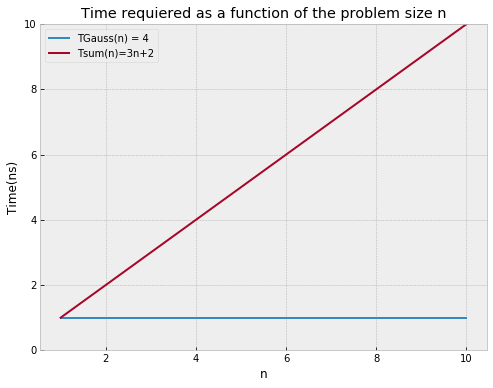

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['TGauss(n) = 4','Tsum(n)=3n+2']
tn = [np.ones(n.shape),n]

# Plot setup
plt.figure(figsize=(8,6))
plt.ylim(0,10)

for i in range(len(tn)):
    plt.plot(n,tn[i],label = labels[i])

plt.legend()
plt.title('Time requiered as a function of the problem size n')
plt.ylabel('Time(ns)')
plt.xlabel('n')

## Big O notation

<div class="alert alert-info">
    Big-O notation gives an upper bound of the complexity in the <b>worst</b> case, helping to quantify performance as the input size becomes <b>arbitrarily large</b>.
</div>

Text(0.5, 0, 'n')

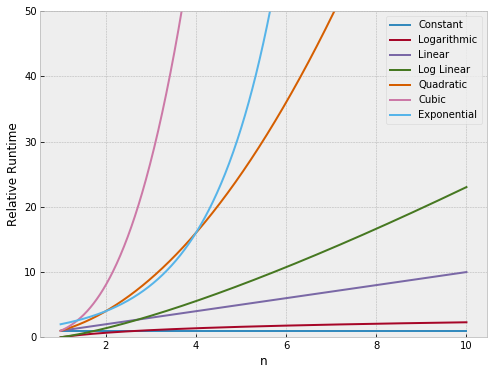

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
%matplotlib inline

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(8,6))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])

plt.legend()
plt.ylabel('Relative Runtime')
plt.xlabel('n')

n: the size of the input

The running time can't get any worse than O($n^3$)

Note how much of a difference a Big-O efficiency can make for the same n value against the projected runtime. Clearly we want to choose algorithms that stay away from any exponential, quadratic, or cubic behavior!

### Big-O efficiencies tables of List  operations
<table>
        <tr>
            <th>List Operations </th>
            <th>Big-O Efficiency</th>
        </tr>
        <tr>
            <td>index []</td>
            <td>O(1)</td>
        </tr>
        <tr>
            <td>index assignment</td>
            <td>O(1)</td>
        </tr>
        <tr>
            <td>append</td>
            <td>O(1)</td>
        </tr>
        <tr>
            <td>pop()</td>
            <td>O(1)</td>
        </tr>
        <tr>
            <td>pop(i)</td>
            <td>O(n)</td>
        </tr>
        <tr >
            <td>insert(i,item)</td>
            <td>O(n)</td>
        </tr>
        <tr>
            <td>del operator</td>
            <td>O(n)</td>
        </tr>
        <tr>
            <td>iteration</td>
            <td>O(n)</td>
        </tr>
        <tr>
            <td>contains (in)</td>
            <td>O(n)</td>
        </tr>
        <tr>
            <td>get slice [x:y]</td>
            <td>O(k)</td>
        </tr>
        <tr>
            <td>del slice</td>
            <td>O(n)</td>
        </tr>
        <tr>
            <td>set slice</td>
            <td>O(n+k)</td>
        </tr>
        <tr>
            <td>reverse</td>
            <td>O(n)</td>
        </tr>
        <tr>
            <td>concatenate</td>
            <td>O(k)</td>
        </tr>
        <tr>
            <td>sort</td>
            <td>O(n log n)</td>
        </tr>
        <tr>
            <td>multiply</td>
            <td>O(nk)</td>
        </tr>

The two most common operations performed on a list are indexing and assigning to an index position. These operations are both designed to be run in constant time, O(1).

Test different methods to construct a list that is [0,1,2...10000]. Compare various methods, such as appending to the end of a list, concatenating a list, or using tools such as casting and list comprehension.


We can clearly see that the most effective method is the built-in range() function in Python!

In [50]:
def method1():
    l = []
    for n in range(10000):
        l = l + [n]

def method2():
    l = []
    for n in range(10000):
        l.append(n)

def method3():
    l = [n for n in range(10000)]  #list comprehension

def method4():
    l = range(10000) # Python 3: list(range(10000))

In [51]:
%timeit method1()
%timeit method2()
%timeit method3()
%timeit method4()

285 ms ± 2.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.33 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
671 µs ± 3.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
674 ns ± 12.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Example

Calculate its T(n) and BigO functions.

Discuss the worst and the best cases

In [ ]:
#Pseudocode
Algorithm findmax(data)
    max = -999999      #1
    for c in data:     #n
        if c>max:      #1*n
            max = c    #1*n
    return max         #1

T(n)=3n+2

O(n)=1

There are no worst and best cases, all the elements of data must be visited

https://stackoverflow.com/questions/487258/what-is-a-plain-english-explanation-of-big-o-notation/487278#487278

https://stackoverflow.com/questions/2307283/what-does-olog-n-mean-exactly